<a href="https://www.kaggle.com/code/aravindnagarajan/multilabelclass?scriptVersionId=195957004" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

sns.set(style='darkgrid')

### Load Datasets

In [2]:
# read dataset and save a copy from it before preprocessing
train = pd.read_csv(r'/kaggle/input/multilabel-classification-dataset/train.csv')
predictfor=pd.read_csv(r"/kaggle/input/multilabel-classification-dataset/test.csv")

### Data Exploratory and Analysis

In [3]:
train.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


Train data is about 9 columns

3 columns for the x or input

6 columns for the y or output (5 labels)

We have 6 numerical cols and 2 object cols (strings)

continous columns and 5 categorical columns

In [5]:
train.isnull().sum()

ID                      0
TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64

No Null values in any column

In [6]:
train.duplicated(train[1:]).sum()

0

No duplicate rows for the data without the ID column

In [7]:
# drop ID column to visualize the data
train.drop(columns=['ID'], axis=1, inplace=True)
train.head()

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


### Dataset Histogram

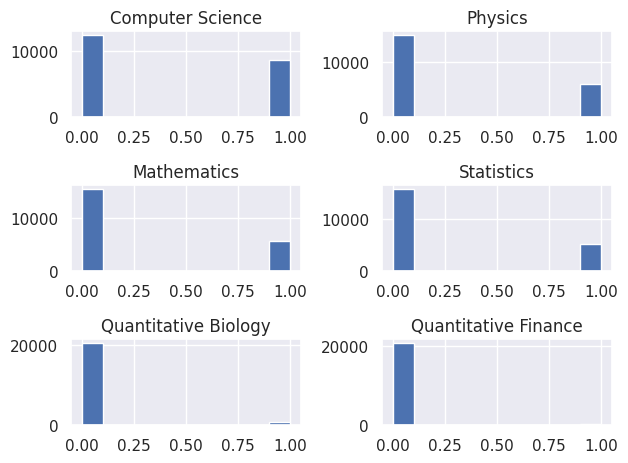

In [8]:
train.hist()
plt.tight_layout()
plt.show()

From the general histplot:

*   The majority label is Computer Science
*   The minority label is Quantitative Finance




### Dataset Label Association

<Axes: >

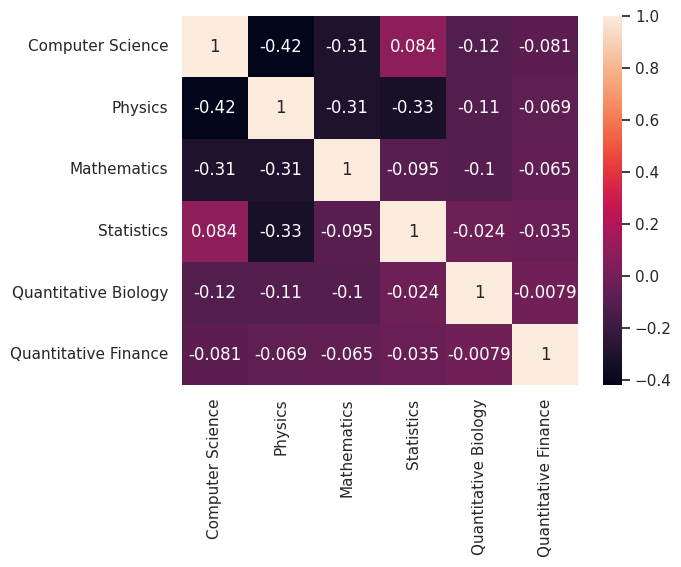

In [9]:
corr_matrix = train.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='rocket')

There is weak association between the labels.

### Data Splitting (Train test)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:, :2], train.iloc[:, 2:], test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14680, 2) (6292, 2) (14680, 6) (6292, 6)


In [11]:
X_train.head()

,TITLE,ABSTRACT
8037,Modelling Luminous-Blue-Variable Isolation,Observations show that luminous blue variabl...
18469,The MUSE view of He 2-10: no AGN ionization bu...,We study the physical and dynamical properti...
5028,The Frobenius problem for four numerical semig...,The greatest integer that does not belong to...
11658,Constraining the contribution of active galact...,Recent results have suggested that active ga...
280,Non-Parametric Calibration of Probabilistic Re...,The task of calibration is to retrospectivel...


### Text data preprocessing

In [12]:
def preprocess_text(data):
  data = data['TITLE'] + ' ' + data['ABSTRACT']
  tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
  data_vectorized = tfidf_vectorizer.fit_transform(data)
  return data_vectorized

In [13]:
X_train = preprocess_text(X_train)
X_test = preprocess_text(X_test)
print(X_train.shape, X_test.shape)

(14680, 500) (6292, 500)


### Building the MultiLabel Classification model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

input_shape = X_train.shape[1]
num_labels = y_train.shape[1]

# model architecture
model = Sequential([
    Dense(512, input_shape=(input_shape,), activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_labels, activation='sigmoid')
])

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# model summary
model.summary() 


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       256,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,950 (1.23 MB)

 Trainable params: 322,950 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

### Model Fitting with 60-40 train val split

In [16]:
history = model.fit(X_train.toarray(), y_train.values, epochs=100, validation_split=0.4, callbacks=[early_stopping])

Epoch 1/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2076 - loss: 0.6986 - val_accuracy: 0.2851 - val_loss: 0.6757
Epoch 2/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2864 - loss: 0.6728 - val_accuracy: 0.3854 - val_loss: 0.6476
Epoch 3/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3378 - loss: 0.6432 - val_accuracy: 0.4150 - val_loss: 0.6127
Epoch 4/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3751 - loss: 0.6067 - val_accuracy: 0.4176 - val_loss: 0.5718
Epoch 5/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3980 - loss: 0.5645 - val_accuracy: 0.4176 - val_loss: 0.5296
Epoch 6/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3911 - loss: 0.5236 - val_accuracy: 0.4176 - val_loss: 0.4928
Epoch 7/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4115 - loss: 0.4900 - val_accuracy: 0.4176 - val_loss: 0.4655
Epoch 8/100
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4192 - loss: 0.4668 - val_accu

### Save model weights

In [15]:
model.save('model.h5')  

# To load the model later and resume training:
from tensorflow.keras.models import load_model
model = load_model('/kaggle/input/multiclass_seq/keras/default/1/model.h5')

### Plot Training Accuracy and Loss curves

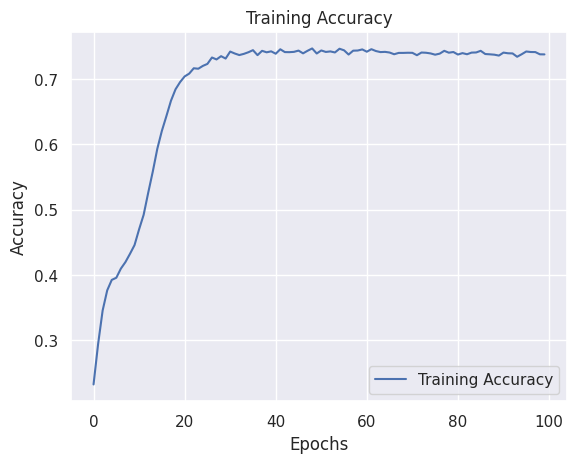

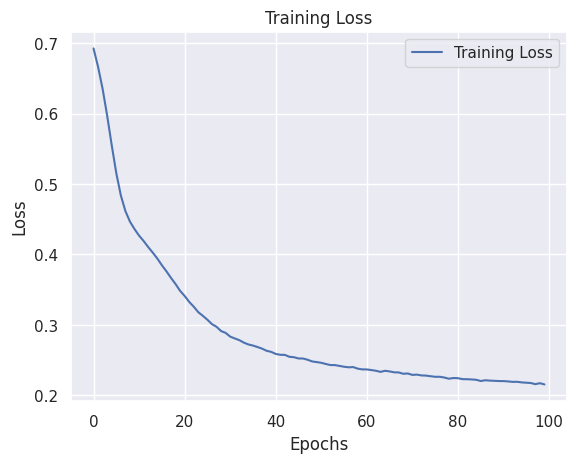

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Accuracy on Test Split

In [16]:
test_loss, test_accuracy = model.evaluate(X_test.toarray(), y_test.values)
print(f'Test Accuracy= {round(test_accuracy,2)*100}%\nTest Loss= {round(test_loss,2)}')

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4305 - loss: 0.4543
Test Accuracy= 43.0%
Test Loss= 0.45


## Prediction on New Data

In [17]:
predictfor.drop(columns=['ID'], axis=1, inplace=True)
predictfor.head()

,TITLE,ABSTRACT
0,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [18]:
predict = preprocess_text(predictfor)
predict.shape

(8989, 500)

In [19]:
predictions = model.predict(predict.toarray())
predicted_labels = (predictions >= 0.5).astype(int)

class_mapping = {
    0: "Computer Science",
    1: "Physics",
    2: "Mathematics",
    3: "Statistics",
    4: "Quantitative Biology",
    5: "Quantitative Finance"
}

results = predictfor.copy()

def get_predicted_classes(label_vector):
    return ', '.join([class_mapping[i] for i, val in enumerate(label_vector) if val == 1])

results['Predicted Classes'] = [get_predicted_classes(label) for label in predicted_labels]

pd.set_option('display.max_colwidth', None)

multi_label_rows = results[results['Predicted Classes'].str.contains(',')]
multi_label_rows.head(4)

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,TITLE,ABSTRACT,Predicted Classes
8,Natural Language Does Not Emerge 'Naturally' in Multi-Agent Dialog,"A number of recent works have proposed techniques for end-to-end learning of\ncommunication protocols among cooperative multi-agent populations, and have\nsimultaneously found the emergence of grounded human-interpretable language in\nthe protocols developed by the agents, all learned without any human\nsupervision!\nIn this paper, using a Task and Tell reference game between two agents as a\ntestbed, we present a sequence of 'negative' results culminating in a\n'positive' one -- showing that while most agent-invented languages are\neffective (i.e. achieve near-perfect task rewards), they are decidedly not\ninterpretable or compositional.\nIn essence, we find that natural language does not emerge 'naturally',\ndespite the semblance of ease of natural-language-emergence that one may gather\nfrom recent literature. We discuss how it is possible to coax the invented\nlanguages to become more and more human-like and compositional by increasing\nrestrictions on how two agents may communicate.\n","Computer Science, Statistics"
11,Towards Universal End-to-End Affect Recognition from Multilingual Speech by ConvNets,"We propose an end-to-end affect recognition approach using a Convolutional\nNeural Network (CNN) that handles multiple languages, with applications to\nemotion and personality recognition from speech. We lay the foundation of a\nuniversal model that is trained on multiple languages at once. As affect is\nshared across all languages, we are able to leverage shared information between\nlanguages and improve the overall performance for each one. We obtained an\naverage improvement of 12.8% on emotion and 10.1% on personality when compared\nwith the same model trained on each language only. It is end-to-end because we\ndirectly take narrow-band raw waveforms as input. This allows us to accept as\ninput audio recorded from any source and to avoid the overhead and information\nloss of feature extraction. It outperforms a similar CNN using spectrograms as\ninput by 12.8% for emotion and 6.3% for personality, based on F-scores.\nAnalysis of the network parameters and layers activation shows that the network\nlearns and extracts significant features in the first layer, in particular\npitch, energy and contour variations. Subsequent convolutional layers instead\ncapture language-specific representations through the analysis of\nsupra-segmental features. Our model represents an important step for the\ndevelopment of a fully universal affect recognizer, able to recognize\nadditional descriptors, such as stress, and for the future implementation into\naffective interactive systems.\n","Computer Science, Statistics"
75,GoDP: Globally optimized dual pathway system for facial landmark localization in-the-wild,"Facial landmark localization is a fundamental module for pose-invariant face\nrecognition. The most common approach for facial landmark detection is cascaded\nregression, which is composed of two steps: feature extraction and facial shape\nregression. Recent methods employ deep convolutional networks to extract robust\nfeatures for each step, while the whole system could be regarded as a deep\ncascaded regression architecture. In this work, instead of employing a deep\nregression network, a Globally Optimized Dual-Pathway (GoDP) deep architecture\nis proposed to identify the target pixels through solving a cascaded pixel\nlabeling problem without resorting to high-level inference models or complex\nstacked architecture. The proposed end-to-end system relies on distance-aware\nsoftmax functions and dual-pathway proposal-refinement architecture. Results\nshow that it outperforms the state-of-the-art cascaded regression-based methods\non multiple in-the-wild face alignment databases. The model achieves 1.84\nnormalized mean error (NME) on the AFLW database, which outperforms 3DDFA by\n61.8%. Experiments on face identification demonst